In [ ]:
import pandas as pd

df = pd.read_excel('MBTI.xlsx')
print(df.shape)
df = df.drop(columns=df.columns[[0, 1]])
# i removed NAN value data is starting from column 2

(316, 75)


In [ ]:
# this is just random output from dataset
df.iloc[:,5]

,Response time
Completion date,
NaT,NaN
NaT,NaN
2024-06-25 08:22:39,0:13:57
2024-06-25 05:37:32,0:10:15
2024-05-25 11:12:49,0:13:54
...,...
2024-06-24 16:16:23,0:14:07
2024-06-24 13:08:17,0:09:16
2024-05-24 11:13:12,0:10:00


A- I examine objective facts (what exists). B- He imagines the facts (what should exist) with his imagination.
A    167
b    147
Name: count, dtype: int64


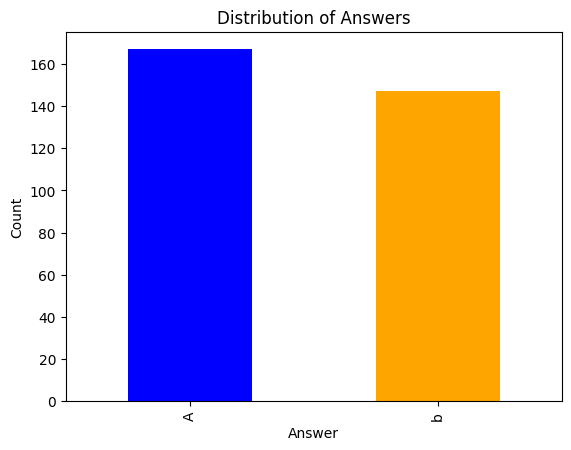

In [ ]:
# plot random column
count_series = df.iloc[:,5].value_counts()
print(count_series)
import matplotlib.pyplot as plt

count_series.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Answers')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()

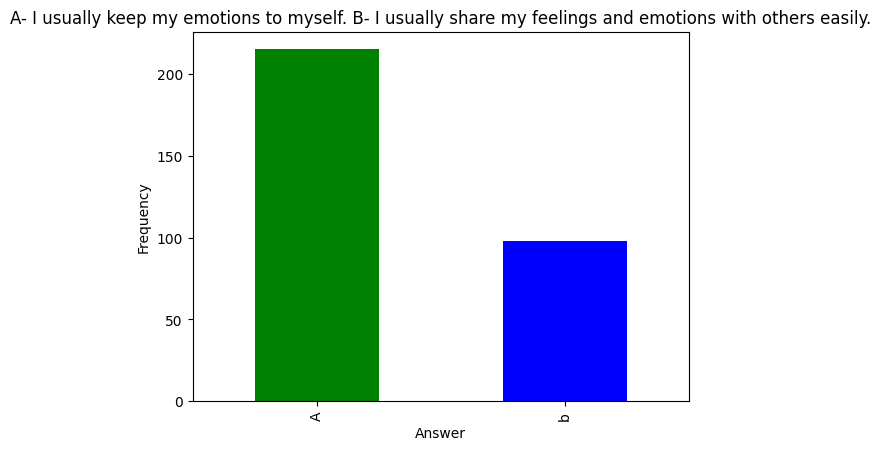

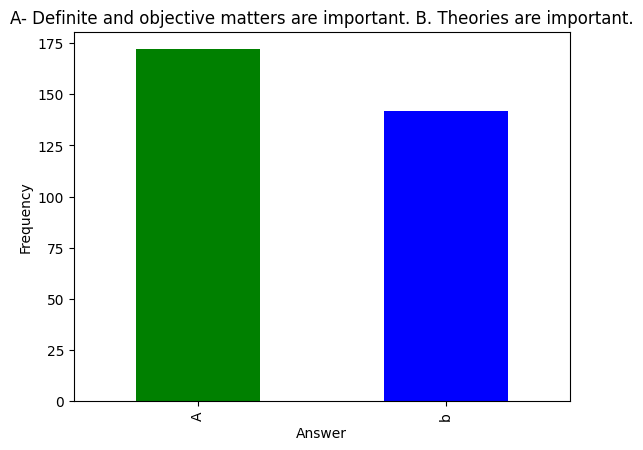

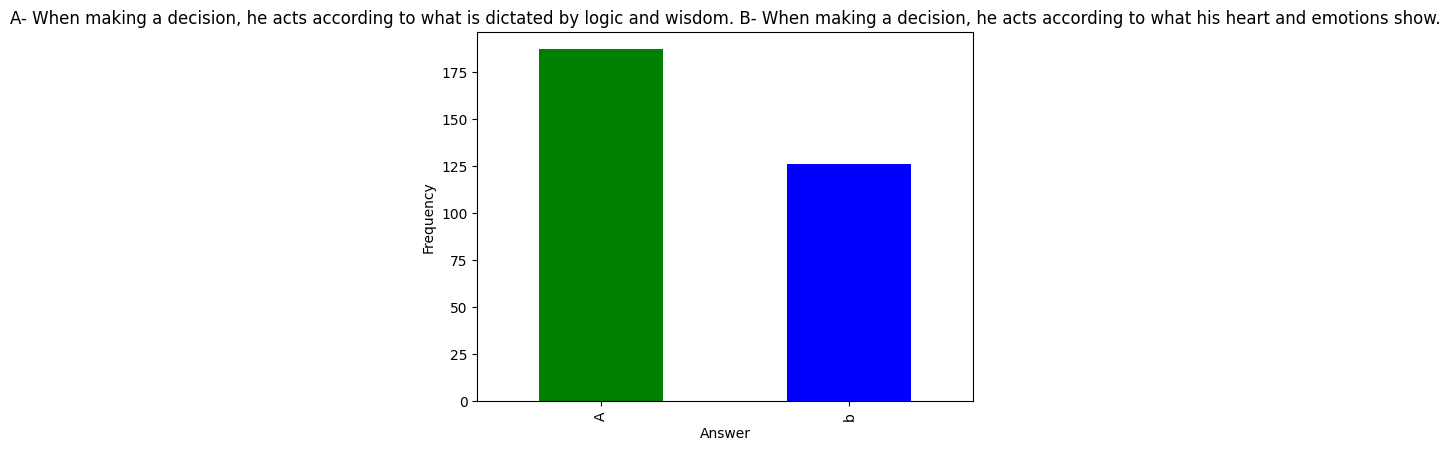

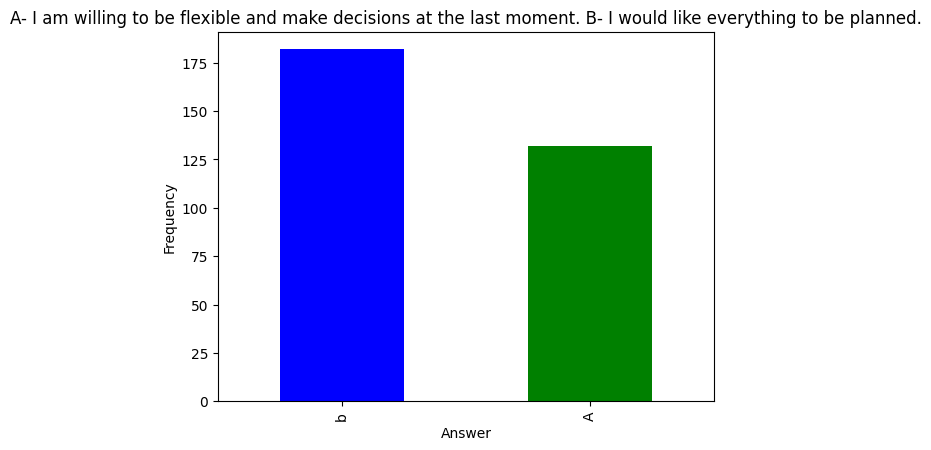

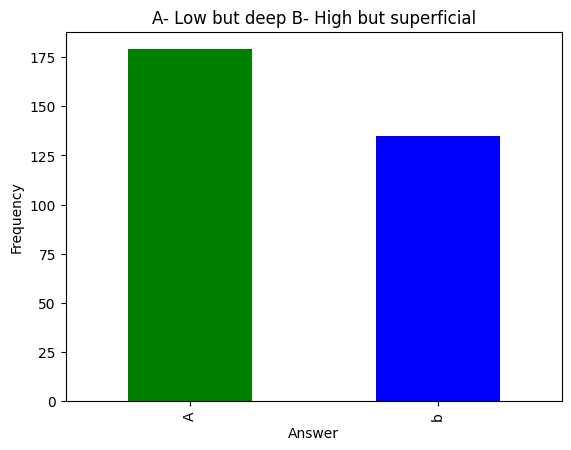

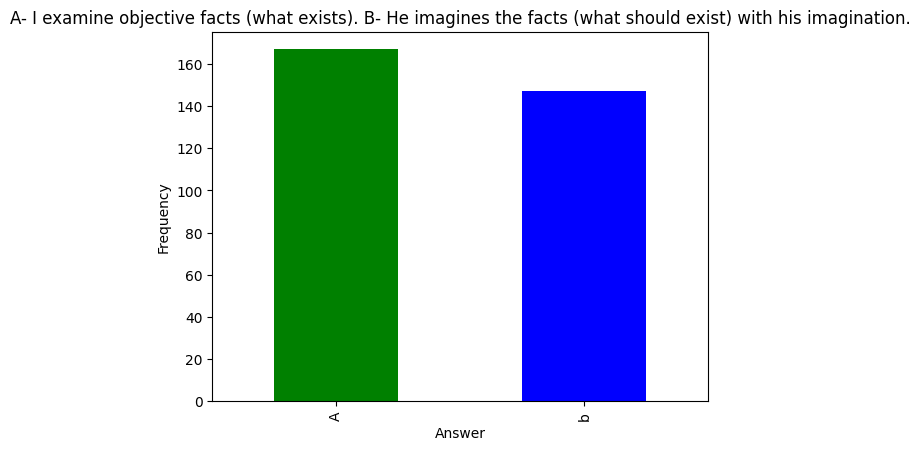

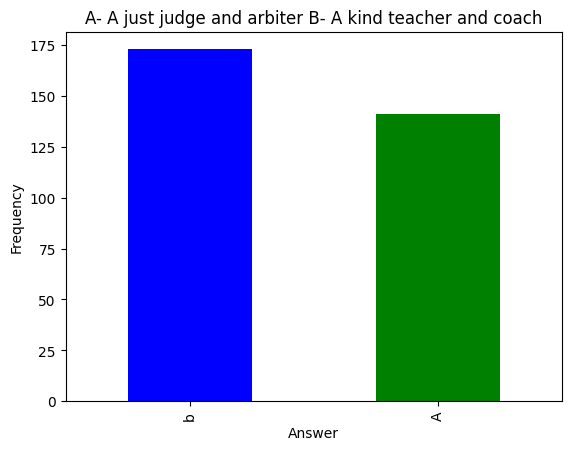

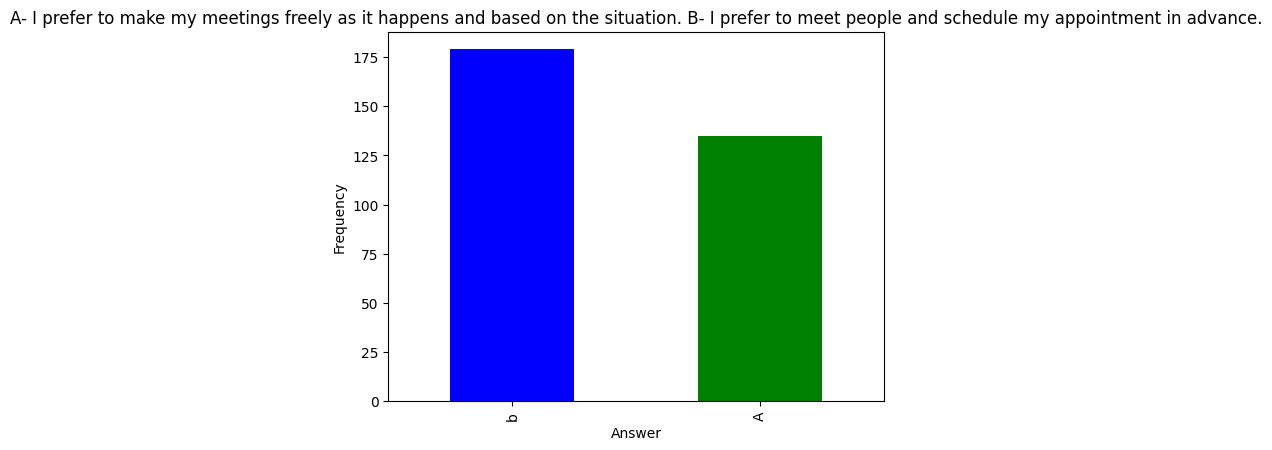

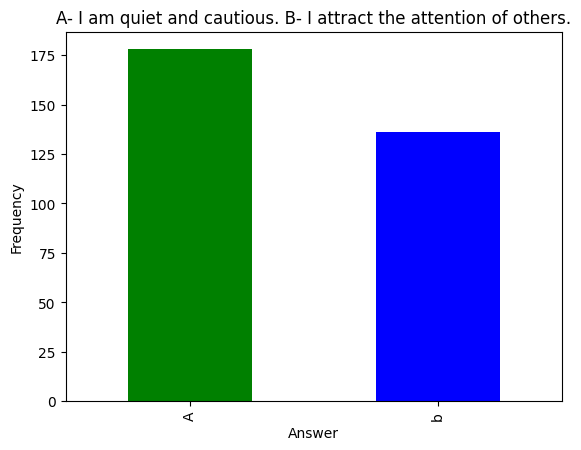

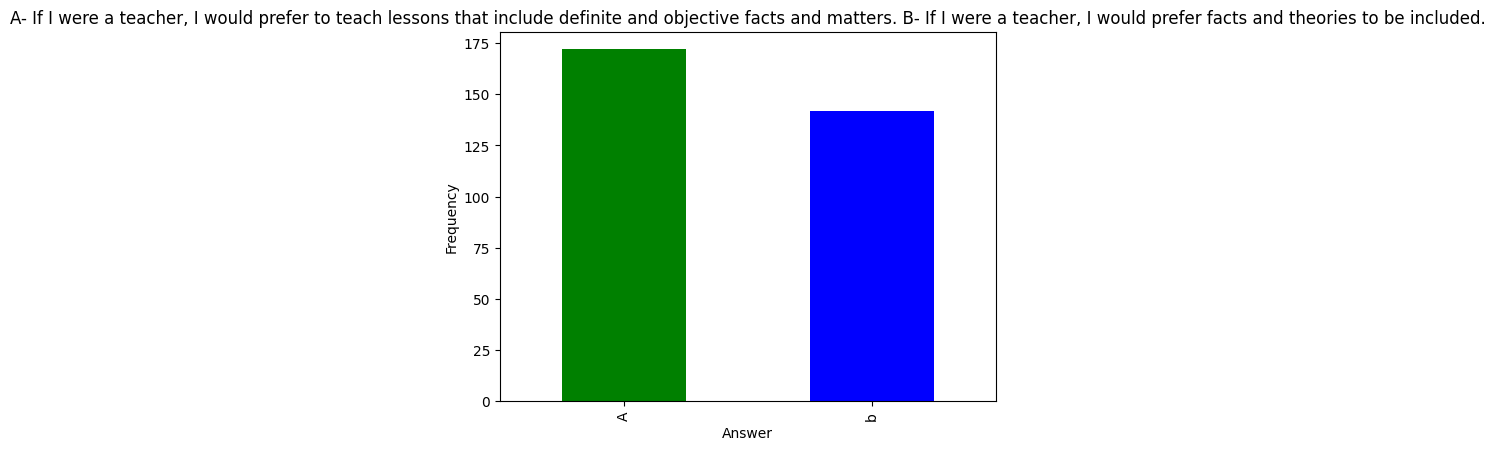

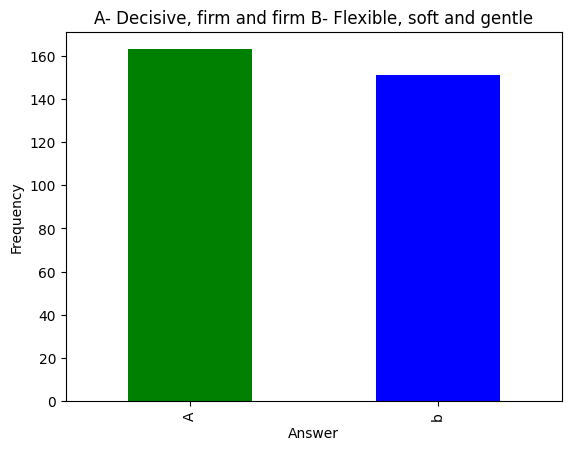

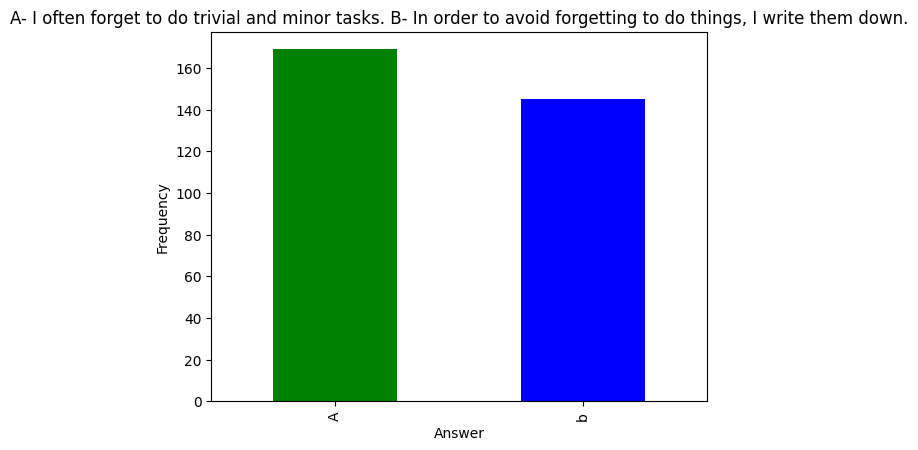

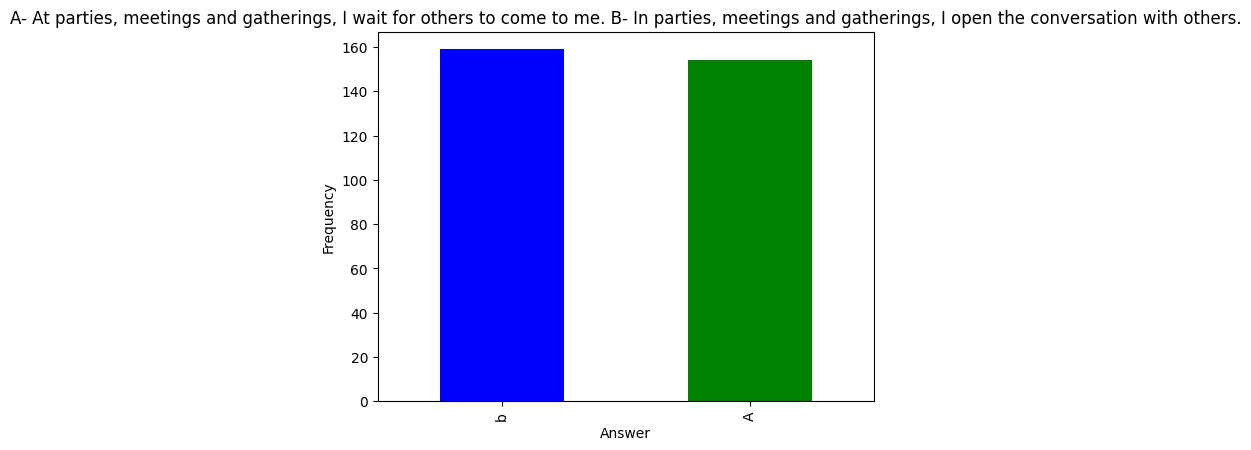

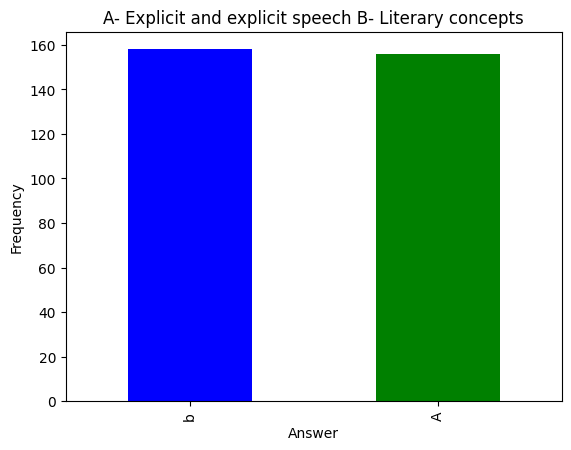

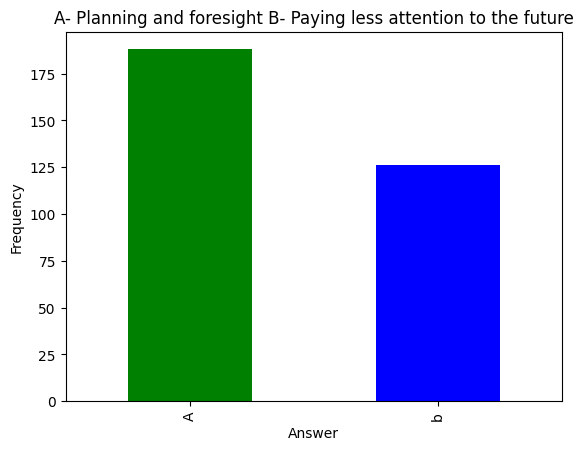

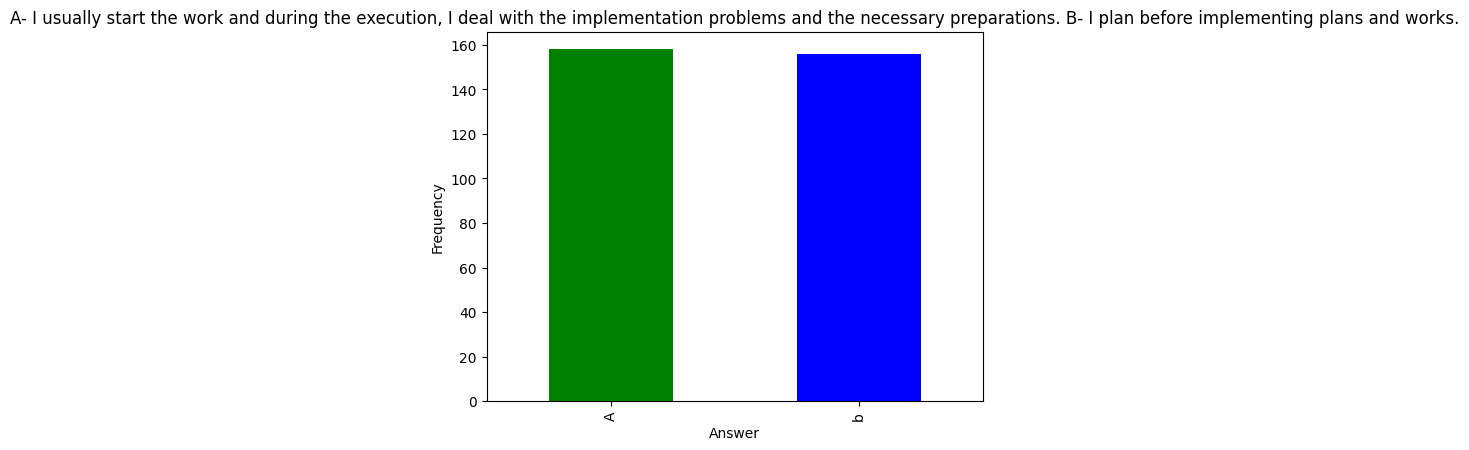

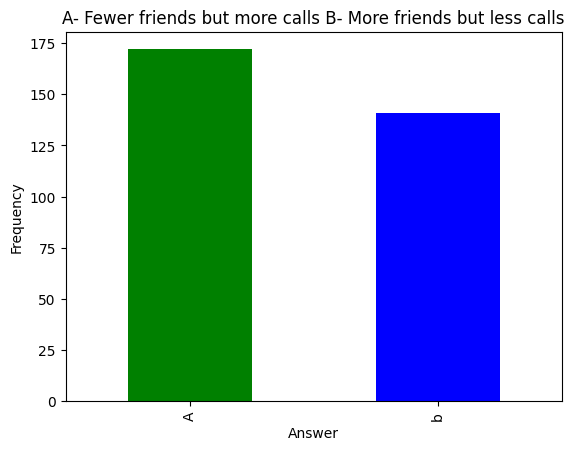

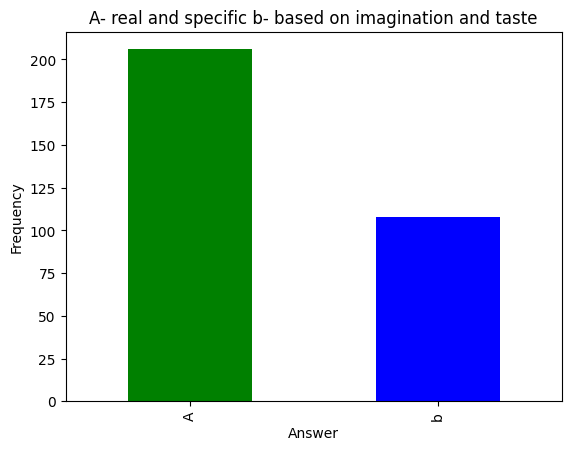

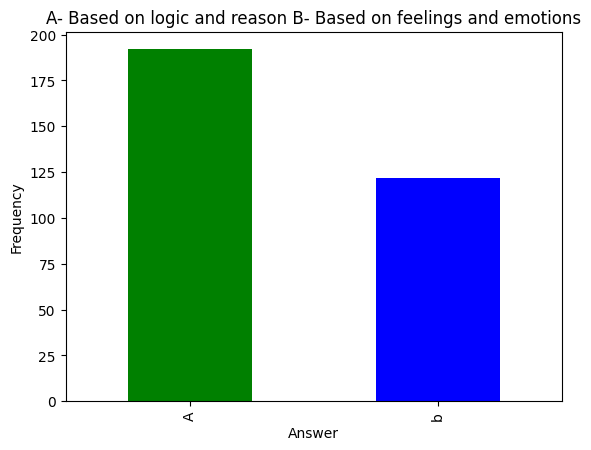

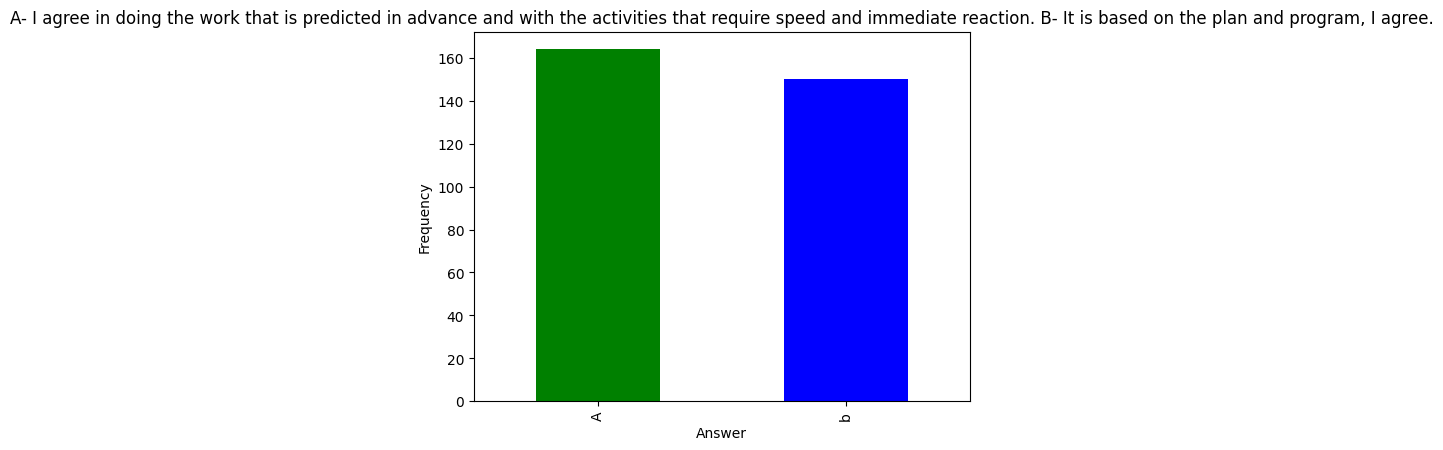

In [ ]:
import matplotlib.pyplot as plt
for i in range(20):
  count_series = df.iloc[:, i].value_counts()
  colors = ['green' if val == 'A' else 'blue' for val in count_series.index]

  plt.figure()
  count_series.plot(kind='bar', color=colors)
  plt.title(f'{df.columns[i]}')
  plt.xlabel('Answer')
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = pd.read_excel('/content/mbti1.xlsx', header=None) # here we are loading cleaned csv

data.shape
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values

#  'A' to 1  'b' to 0
X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

num_classes = 16
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)

# (samples, time steps, features)
X_numerical = X_numerical.reshape((X_numerical.shape[0], X_numerical.shape[1], 1))


X_train, X_test, Y_train, Y_test = train_test_split(X_numerical, Y_one_hot, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  #  (samples, timesteps, features)
print("Y_train shape:", Y_train.shape)  # (samples, num_classes)


print("Number of classes:", num_classes)

X_train shape: (251, 59, 1)
Y_train shape: (251, 16)
Number of classes: 16


In [ ]:
import tensorflow as tf

def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 15s - 2s/step - accuracy: 0.1250 - loss: 2.7497 - val_accuracy: 0.0588 - val_loss: 2.7032 - learning_rate: 0.0010
Epoch 2/200
7/7 - 4s - 601ms/step - accuracy: 0.1250 - loss: 2.6885 - val_accuracy: 0.0980 - val_loss: 2.6196 - learning_rate: 0.0010
Epoch 3/200
7/7 - 0s - 42ms/step - accuracy: 0.1100 - loss: 2.6713 - val_accuracy: 0.0588 - val_loss: 2.5933 - learning_rate: 0.0010
Epoch 4/200
7/7 - 0s - 45ms/step - accuracy: 0.1150 - loss: 2.6305 - val_accuracy: 0.1961 - val_loss: 2.5725 - learning_rate: 0.0010
Epoch 5/200
7/7 - 0s - 40ms/step - accuracy: 0.1250 - loss: 2.6332 - val_accuracy: 0.0588 - val_loss: 2.5745 - learning_rate: 0.0010
Epoch 6/200
7/7 - 0s - 24ms/step - accuracy: 0.1500 - loss: 2.6009 - val_accuracy: 0.0588 - val_loss: 2.5869 - learning_rate: 0.0010
Epoch 7/200
7/7 - 0s - 41ms/step - accuracy: 0.1400 - loss: 2.5923 - val_accuracy: 0.0588 - val_loss: 2.5553 - learning_rate: 0.0010
Epoch 8/200
7/7 - 0s - 27ms/step - accuracy: 0.1400 - loss: 2.5816 - val_accuracy

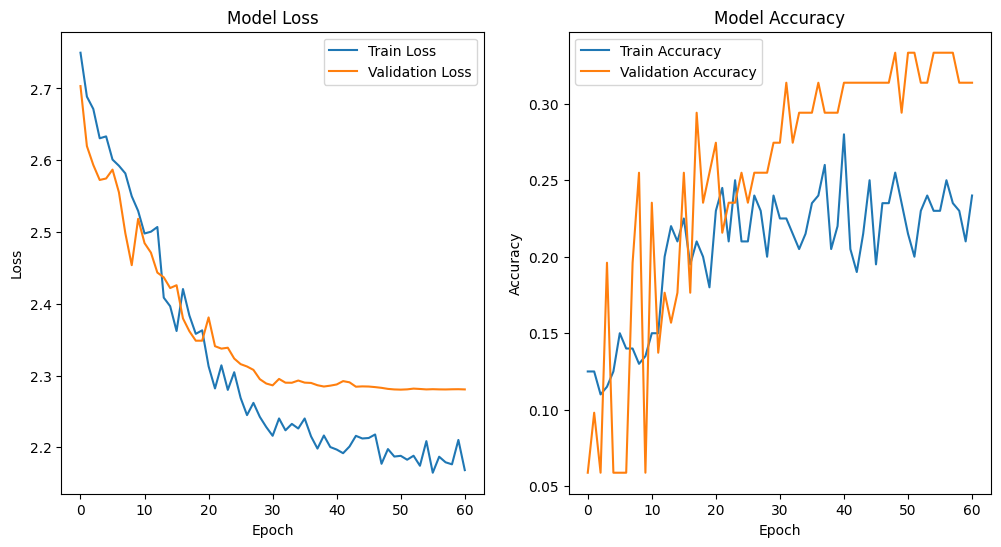

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt


model = Sequential()


model.add(Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32, activation='tanh')))
model.add(Dropout(0.3))


model.add(Dense(units=16, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def scheduler(epoch, lr):
    """Learning rate  function"""
    if epoch < 10:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.1)
        return float(new_lr.numpy())

lr_scheduler = LearningRateScheduler(scheduler)


history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 59, 128)             │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,146 (891.20 KB)

 Trainable params: 76,048 (297.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 152,098 (594.14 KB)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_acc}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3052 - loss: 2.2538
Test Accuracy: 0.30158731341362


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print(f'Test Accuracy: {test_acc:.4f}')


predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

#Randomly print true label vs model predict
print("\nSample Predictions vs True Labels:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  True Label: {true_classes[i]}")
    print(f"  Predicted Label: {predicted_classes[i]}")
    print()


2/2 - 0s - 16ms/step - accuracy: 0.3016 - loss: 2.2568
Test Accuracy: 0.3016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Sample Predictions vs True Labels:
Sample 1:
  True Label: 12
  Predicted Label: 12

Sample 2:
  True Label: 11
  Predicted Label: 12

Sample 3:
  True Label: 15
  Predicted Label: 15

Sample 4:
  True Label: 7
  Predicted Label: 14

Sample 5:
  True Label: 0
  Predicted Label: 0



In [ ]:

sample_index = 2 #randomly we are selecting 2
sample_data = X_test[sample_index]
sample_raw = data.iloc[sample_index, :X_test.shape[1]]


prediction = model.predict(np.expand_dims(sample_data, axis=0))
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = label_encoder.inverse_transform([predicted_class])[0]


print(f"Raw Data (Row {sample_index}):")
print(sample_raw)
print(f"Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Raw Data (Row 2):
0     A
1     b
2     A
3     b
4     A
5     A
6     A
7     b
8     A
9     A
10    A
11    A
12    b
13    b
14    A
15    b
16    A
17    A
18    A
19    A
20    A
21    b
22    A
23    b
24    A
25    A
26    b
27    b
28    A
29    A
30    A
31    b
32    A
33    A
34    A
35    b
36    A
37    A
38    b
39    b
40    A
41    A
42    A
43    A
44    A
45    b
46    A
47    b
48    A
49    A
50    A
51    b
52    A
53    A
54    A
55    b
56    A
57    b
58    b
Name: 2, dtype: object
Predicted Class: ISTP


In [2]:
import pandas as pd
import numpy as np

file_path = 'mbti2.xlsx'
df = pd.read_excel(file_path, header=None)


df.columns = [f'Feature_{i+1}' for i in range(df.shape[1] - 1)] + ['Label']

df.replace({'A': 1, 'b': 0}, inplace=True)

num_synthetic_rows = 10000
num_features = df.shape[1] - 1


labels = df['Label'].unique()


synthetic_data = []

for _ in range(num_synthetic_rows): # becasue we have just. A and b just we need to generete 0 and 1
    features = np.random.choice([0, 1], size=num_features) # random 10000

    label = np.random.choice(labels)

    synthetic_data.append(np.append(features, label))

synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

synthetic_df.to_excel('synthetic_data.xlsx', index=False)

print(synthetic_df)


     Feature_1 Feature_2 Feature_3 Feature_4 Feature_5 Feature_6 Feature_7  \
0            1         1         0         0         0         1         0   
1            1         0         1         0         0         1         1   
2            1         1         1         1         0         0         0   
3            0         0         0         1         0         1         0   
4            1         1         1         1         1         1         0   
...        ...       ...       ...       ...       ...       ...       ...   
9995         0         0         1         0         0         1         1   
9996         1         0         0         1         1         0         1   
9997         1         0         1         0         1         1         1   
9998         1         1         1         1         0         0         0   
9999         1         0         1         1         0         1         0   

     Feature_8 Feature_9 Feature_10  ... Feature_52 Feature_53 

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0686 - loss: 2.7726 - val_accuracy: 0.0615 - val_loss: 2.7735 - learning_rate: 0.0010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0901 - loss: 2.7616 - val_accuracy: 0.0630 - val_loss: 2.7758 - learning_rate: 0.0010
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1002 - loss: 2.7460 - val_accuracy: 0.0680 - val_loss: 2.7841 - learning_rate: 0.0010
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1185 - loss: 2.7160 - val_accuracy: 0.0725 - val_loss: 2.7983 - learning_rate: 0.0010
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1292 - loss: 2.6838 - val_accuracy: 0.0635 - val_loss: 2.8200 - learning_rate: 0.0010
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1453 - loss: 2.6386 - val_accuracy: 0.0685 - val_loss: 2.8427 - learning_rate: 0.0010
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1669 - loss: 2.5912 - val_a

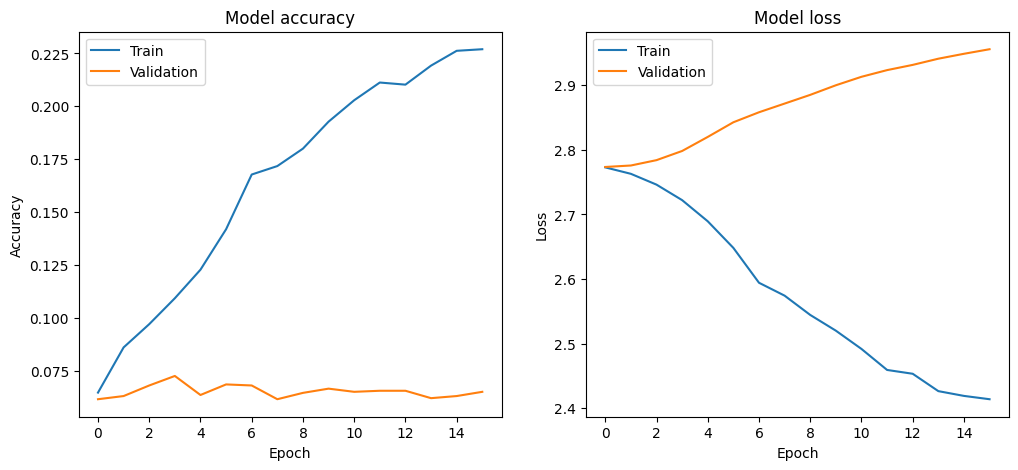

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Original Label: ESFP, Predicted Label: ENTP
Original Label: ISFJ, Predicted Label: ESTJ
Original Label: ISFP, Predicted Label: ESTJ
Original Label: ENTP, Predicted Label: ISFP
Original Label: INTJ, Predicted Label: ESTJ
Original Label: ENFJ, Predicted Label: ENTP
Original Label: ESTP, Predicted Label: ISTJ
Original Label: ISFJ, Predicted Label: ISTJ
Original Label: ESTP, Predicted Label: ENTP
Original Label: INTP, Predicted Label: INTJ


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


data = pd.read_excel('/content/synthetic_data.xlsx')  # this is for data that we genereted it 10 000 raws


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


model = Sequential()
model.add(LSTM(100, input_shape=(1, X_scaled.shape[1]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


history = model.fit(X_reshaped, y_categorical, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


predictions = model.predict(X_reshaped)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)

for i in range(min(10, len(y))):
    print(f"Original Label: {y[i]}, Predicted Label: {predicted_labels[i]}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 - 8s - 956ms/step - accuracy: 0.1355 - loss: 8.4617 - val_accuracy: 0.1429 - val_loss: 7.5854 - learning_rate: 0.0010
Epoch 2/100
8/8 - 1s - 74ms/step - accuracy: 0.1554 - loss: 7.1201 - val_accuracy: 0.1429 - val_loss: 6.6212 - learning_rate: 0.0010
Epoch 3/100
8/8 - 0s - 22ms/step - accuracy: 0.1394 - loss: 6.2768 - val_accuracy: 0.1429 - val_loss: 5.8855 - learning_rate: 0.0010
Epoch 4/100
8/8 - 0s - 40ms/step - accuracy: 0.1673 - loss: 5.5884 - val_accuracy: 0.1429 - val_loss: 5.2972 - learning_rate: 0.0010
Epoch 5/100
8/8 - 0s - 36ms/step - accuracy: 0.1554 - loss: 5.0312 - val_accuracy: 0.1429 - val_loss: 4.7639 - learning_rate: 0.0010
Epoch 6/100
8/8 - 0s - 35ms/step - accuracy: 0.1474 - loss: 4.5610 - val_accuracy: 0.1429 - val_loss: 4.6617 - learning_rate: 0.0010
Epoch 7/100
8/8 - 0s - 41ms/step - accuracy: 0.1554 - loss: 4.2148 - val_accuracy: 0.1429 - val_loss: 3.9725 - learning_rate: 0.0010
Epoch 8/100
8/8 - 0s - 23ms/step - accuracy: 0.1673 - loss: 3.8577 - val_accurac

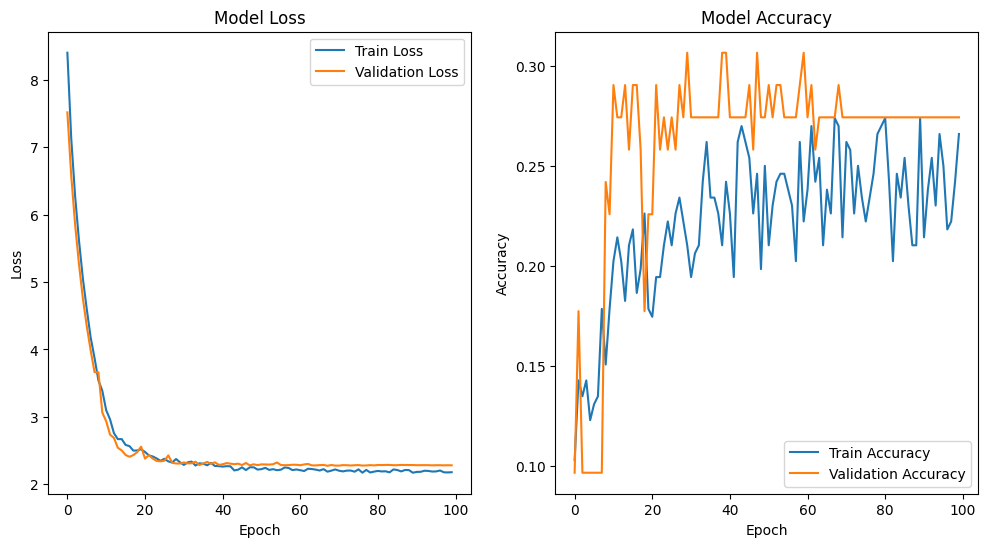

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

data = pd.read_excel('/content/mbti1.xlsx', header=None)  # Adjust the filename as necessary
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values


X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = 16
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)


X_numerical = X_numerical.reshape((X_numerical.shape[0], X_numerical.shape[1], 1))

def create_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(units=128, return_sequences=True, input_shape=(X_numerical.shape[1], 1),
                                 kernel_regularizer=tf.keras.regularizers.l2(0.01))))
    model.add(Dropout(0.3))
    model.add(Bidirectional(GRU(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))))
    model.add(Dropout(0.3))
    model.add(Bidirectional(GRU(units=32, kernel_regularizer=tf.keras.regularizers.l2(0.01))))
    model.add(Dropout(0.3))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


def scheduler(epoch, lr):
    """Learning rate scheduler function"""
    if epoch < 20:
        return lr
    else:
        new_lr = lr * tf.math.exp(-0.05)
        return float(new_lr.numpy())

lr_scheduler = LearningRateScheduler(scheduler)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
fold_results = []
for train_index, val_index in kf.split(X_numerical):
    X_train, X_val = X_numerical[train_index], X_numerical[val_index]
    Y_train, Y_val = Y_one_hot[train_index], Y_one_hot[val_index]

    model = create_model()

    history = model.fit(
        X_train, Y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[lr_scheduler],
        verbose=2
    )

    val_loss, val_accuracy = model.evaluate(X_val, Y_val, verbose=0)
    fold_results.append((val_loss, val_accuracy))
    print(f"Fold {fold} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    fold += 1


average_val_loss = np.mean([result[0] for result in fold_results])
average_val_accuracy = np.mean([result[1] for result in fold_results])
print(f"Average Validation Loss: {average_val_loss}")
print(f"Average Validation Accuracy: {average_val_accuracy}")


X_train_full, X_test, Y_train_full, Y_test = train_test_split(X_numerical, Y_one_hot, test_size=0.2, random_state=42)

final_model = create_model()
final_model.fit(
    X_train_full, Y_train_full,
    epochs=100,
    batch_size=32,
    verbose=2
)


test_loss, test_accuracy = final_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
7/7 - 13s - 2s/step - accuracy: 0.0450 - loss: 4.1446 - val_accuracy: 0.0588 - val_loss: 2.7633
Epoch 2/200
7/7 - 0s - 9ms/step - accuracy: 0.0350 - loss: 3.9017 - val_accuracy: 0.0980 - val_loss: 2.7602
Epoch 3/200
7/7 - 0s - 8ms/step - accuracy: 0.0400 - loss: 4.3384 - val_accuracy: 0.1176 - val_loss: 2.7641
Epoch 4/200
7/7 - 0s - 10ms/step - accuracy: 0.0800 - loss: 3.9985 - val_accuracy: 0.0588 - val_loss: 2.7666
Epoch 5/200
7/7 - 0s - 10ms/step - accuracy: 0.0600 - loss: 3.9012 - val_accuracy: 0.0588 - val_loss: 2.7664
Epoch 6/200
7/7 - 0s - 8ms/step - accuracy: 0.0850 - loss: 3.6211 - val_accuracy: 0.0588 - val_loss: 2.7616
Epoch 7/200
7/7 - 0s - 9ms/step - accuracy: 0.1050 - loss: 3.6423 - val_accuracy: 0.0588 - val_loss: 2.7582
Epoch 8/200
7/7 - 0s - 8ms/step - accuracy: 0.0900 - loss: 3.5329 - val_accuracy: 0.0588 - val_loss: 2.7543
Epoch 9/200
7/7 - 0s - 9ms/step - accuracy: 0.0750 - loss: 3.5297 - val_accuracy: 0.0588 - val_loss: 2.7520
Epoch 10/200
7/7 - 0s - 14

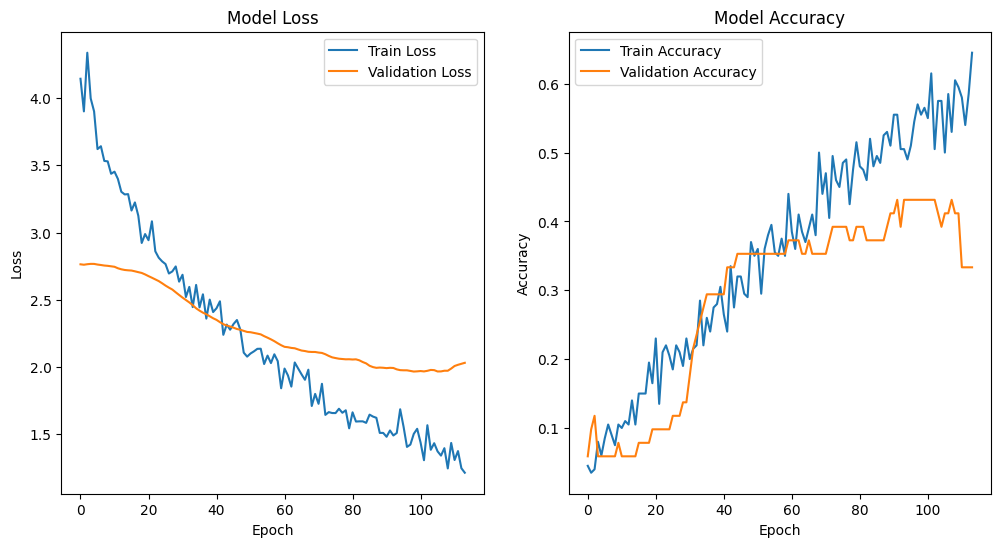

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


data = pd.read_excel('/content/mbti1.xlsx', header=None)
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values

X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = 16
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)


X_train, X_test, Y_train, Y_test = train_test_split(X_numerical, Y_one_hot, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  overfitting in this data because of 0 1 over fitting is happning
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stopping],
    verbose=2
)




plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 2s - 346ms/step - accuracy: 0.0400 - loss: 4.5450 - val_accuracy: 0.0392 - val_loss: 4.4756
Epoch 2/200
7/7 - 0s - 12ms/step - accuracy: 0.0800 - loss: 4.4328 - val_accuracy: 0.0588 - val_loss: 4.3715
Epoch 3/200
7/7 - 0s - 13ms/step - accuracy: 0.0700 - loss: 4.3348 - val_accuracy: 0.0588 - val_loss: 4.2730
Epoch 4/200
7/7 - 0s - 14ms/step - accuracy: 0.1050 - loss: 4.2311 - val_accuracy: 0.0588 - val_loss: 4.1794
Epoch 5/200
7/7 - 0s - 18ms/step - accuracy: 0.0850 - loss: 4.1421 - val_accuracy: 0.0980 - val_loss: 4.0911
Epoch 6/200
7/7 - 0s - 20ms/step - accuracy: 0.0950 - loss: 4.0542 - val_accuracy: 0.1176 - val_loss: 4.0076
Epoch 7/200
7/7 - 0s - 12ms/step - accuracy: 0.1150 - loss: 3.9766 - val_accuracy: 0.1373 - val_loss: 3.9288
Epoch 8/200
7/7 - 0s - 11ms/step - accuracy: 0.1100 - loss: 3.8955 - val_accuracy: 0.1765 - val_loss: 3.8546
Epoch 9/200
7/7 - 0s - 14ms/step - accuracy: 0.1550 - loss: 3.8216 - val_accuracy: 0.1961 - val_loss: 3.7852
Epoch 10/200
7/7 - 0s - 18ms/s

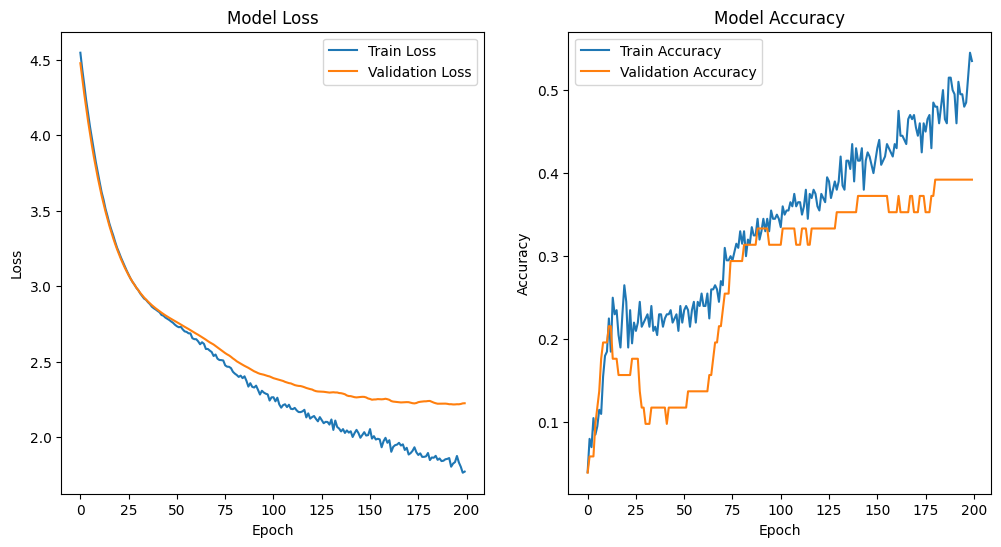

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


data = pd.read_excel('/content/mbti1.xlsx', header=None)
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values


X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_numerical)


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = 16
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)


X_reshaped = X_normalized.reshape((X_normalized.shape[0], 1, X_normalized.shape[1]))


X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y_one_hot, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)




plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [37]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 1, 64)               │          31,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,066 (523.70 KB)

 Trainable params: 44,688 (174.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,378 (349.14 KB)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
7/7 - 4s - 520ms/step - accuracy: 0.0950 - loss: 5.4493 - val_accuracy: 0.1176 - val_loss: 4.5504
Epoch 2/200
7/7 - 0s - 21ms/step - accuracy: 0.0750 - loss: 5.3673 - val_accuracy: 0.1373 - val_loss: 4.5129
Epoch 3/200
7/7 - 0s - 20ms/step - accuracy: 0.1000 - loss: 5.3577 - val_accuracy: 0.1765 - val_loss: 4.4775
Epoch 4/200
7/7 - 0s - 21ms/step - accuracy: 0.1050 - loss: 5.1819 - val_accuracy: 0.1765 - val_loss: 4.4442
Epoch 5/200
7/7 - 0s - 20ms/step - accuracy: 0.0900 - loss: 5.0004 - val_accuracy: 0.1765 - val_loss: 4.4125
Epoch 6/200
7/7 - 0s - 40ms/step - accuracy: 0.1250 - loss: 5.0722 - val_accuracy: 0.2157 - val_loss: 4.3824
Epoch 7/200
7/7 - 1s - 109ms/step - accuracy: 0.1000 - loss: 4.9765 - val_accuracy: 0.2157 - val_loss: 4.3531
Epoch 8/200
7/7 - 0s - 67ms/step - accuracy: 0.1150 - loss: 4.9634 - val_accuracy: 0.2157 - val_loss: 4.3246
Epoch 9/200
7/7 - 0s - 39ms/step - accuracy: 0.1100 - loss: 4.8038 - val_accuracy: 0.2157 - val_loss: 4.2969
Epoch 10/200
7/7 

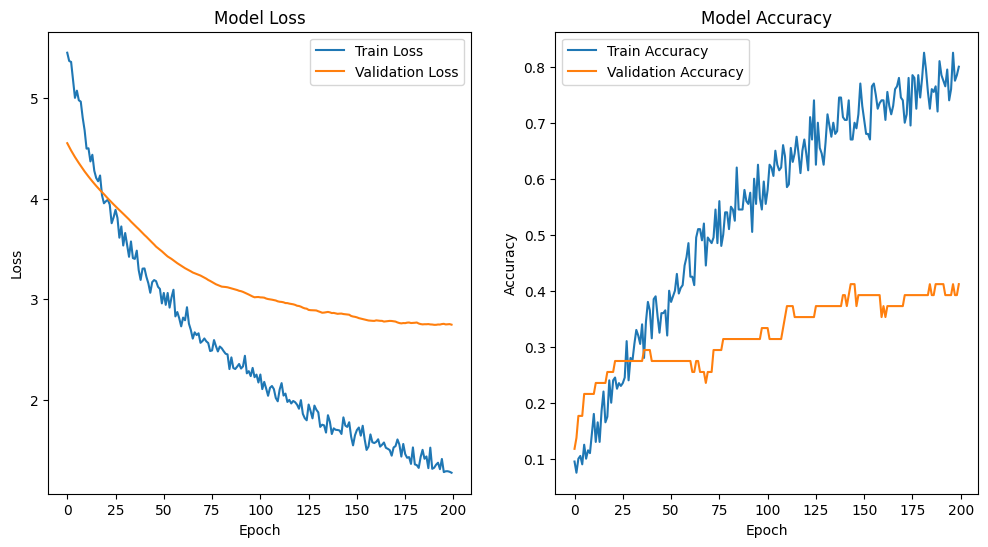

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


data = pd.read_excel('/content/mbti1.xlsx', header=None)  # Adjust the filename as necessary
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values


X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_numerical)


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = 16
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)


X_reshaped = X_normalized.reshape((X_normalized.shape[0], 1, X_normalized.shape[1]))


X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y_one_hot, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)


history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=2
)



plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [39]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 1, 64)               │          31,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,834 (526.70 KB)

 Trainable params: 44,880 (175.31 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 89,762 (350.64 KB)

In [40]:
import numpy as np


num_samples = 10
X_sample = X_test[:num_samples]
Y_sample_true = Y_test[:num_samples]


predictions = model.predict(X_sample)


predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_sample_true, axis=1)


predicted_labels = label_encoder.inverse_transform(predicted_classes)
true_labels = label_encoder.inverse_transform(true_classes)

for i in range(num_samples):
    print(f"Sample {i+1}:")
    print(f"True Label: {true_labels[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Sample 1:
True Label: ISFJ
Predicted Label: ISFJ

Sample 2:
True Label: INTP
Predicted Label: INTP

Sample 3:
True Label: ISTP
Predicted Label: ISTP

Sample 4:
True Label: ESTP
Predicted Label: ESTP

Sample 5:
True Label: ENFJ
Predicted Label: INFJ

Sample 6:
True Label: ENFP
Predicted Label: ENFP

Sample 7:
True Label: INFJ
Predicted Label: ISTJ

Sample 8:
True Label: ISTJ
Predicted Label: ISTJ

Sample 9:
True Label: ISTP
Predicted Label: ISTP

Sample 10:
True Label: ISTJ
Predicted Label: ISFJ



In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_excel('/content/mbti1.xlsx', header=None)  # Adjust the filename as necessary
X = data.iloc[:, :59].values
Y = data.iloc[:, 60].values


X_numerical = np.array([[1 if val == 'A' else 0 for val in row] for row in X])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_numerical)


label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
num_classes = len(np.unique(Y_encoded))
Y_one_hot = to_categorical(Y_encoded, num_classes=num_classes)


X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_encoded, test_size=0.2, random_state=42)

Y_train_2d = Y_train
Y_test_2d = Y_test


class_names = label_encoder.classes_

def print_classification_report(model_name, Y_true, Y_pred):
    """
    Print classification report for a given model.
    """
    print(f"{model_name} Accuracy: {accuracy_score(Y_true, Y_pred)}")
    print(classification_report(Y_true, Y_pred, target_names=class_names))




decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train_2d)
Y_pred_tree = decision_tree.predict(X_test)
print_classification_report("Decision Tree", Y_test_2d, Y_pred_tree)




gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(X_train, Y_train_2d)
Y_pred_gbm = gbm.predict(X_test)
print_classification_report("Gradient Boosting Machine", Y_test_2d, Y_pred_gbm)


adaboost = AdaBoostClassifier(n_estimators=100)
adaboost.fit(X_train, Y_train_2d)
Y_pred_adaboost = adaboost.predict(X_test)
print_classification_report("AdaBoost", Y_test_2d, Y_pred_adaboost)






Decision Tree Accuracy: 0.20634920634920634
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00         6
        ENFP       0.00      0.00      0.00         4
        ENTJ       0.00      0.00      0.00         1
        ENTP       0.00      0.00      0.00         2
        ESFJ       0.50      0.29      0.36         7
        ESFP       0.00      0.00      0.00         4
        ESTJ       1.00      0.25      0.40         4
        ESTP       0.17      0.50      0.25         2
        INFJ       0.00      0.00      0.00         2
        INFP       0.20      0.25      0.22         4
        INTJ       0.00      0.00      0.00         0
        INTP       0.00      0.00      0.00         2
        ISFJ       0.50      0.75      0.60         4
        ISFP       0.00      0.00      0.00         1
        ISTJ       0.10      0.09      0.10        11
        ISTP       0.40      0.44      0.42         9

    accuracy                        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Gradient Boosting Machine Accuracy: 0.31746031746031744
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00         6
        ENFP       0.33      0.25      0.29         4
        ENTJ       0.00      0.00      0.00         1
        ENTP       0.00      0.00      0.00         2
        ESFJ       0.67      0.29      0.40         7
        ESFP       0.12      0.25      0.17         4
        ESTJ       1.00      0.25      0.40         4
        ESTP       0.20      0.50      0.29         2
        INFJ       0.00      0.00      0.00         2
        INFP       0.00      0.00      0.00         4
        INTJ       0.00      0.00      0.00         0
        INTP       0.33      0.50      0.40         2
        ISFJ       0.50      0.50      0.50         4
        ISFP       0.00      0.00      0.00         1
        ISTJ       0.60      0.55      0.57        11
        ISTP       0.50      0.56      0.53         9

    accuracy            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

AdaBoost Accuracy: 0.1746031746031746
              precision    recall  f1-score   support

        ENFJ       0.20      0.17      0.18         6
        ENFP       0.00      0.00      0.00         4
        ENTJ       0.00      0.00      0.00         1
        ENTP       0.00      0.00      0.00         2
        ESFJ       1.00      0.29      0.44         7
        ESFP       0.17      0.25      0.20         4
        ESTJ       0.00      0.00      0.00         4
        ESTP       0.00      0.00      0.00         2
        INFJ       0.00      0.00      0.00         2
        INFP       0.50      0.25      0.33         4
        INTJ       0.00      0.00      0.00         0
        INTP       0.00      0.00      0.00         2
        ISFJ       0.40      0.50      0.44         4
        ISFP       0.00      0.00      0.00         1
        ISTJ       0.31      0.36      0.33        11
        ISTP       0.00      0.00      0.00         9

    accuracy                           0.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier, Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, Y_train_2d)
Y_pred_ridge = ridge_classifier.predict(X_test)
print_classification_report("Ridge Classifier", Y_test_2d, Y_pred_ridge)

perceptron = Perceptron()
perceptron.fit(X_train, Y_train_2d)
Y_pred_perceptron = perceptron.predict(X_test)
print_classification_report("Perceptron", Y_test_2d, Y_pred_perceptron)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train_2d)
Y_pred_qda = qda.predict(X_test)
print_classification_report("QDA", Y_test_2d, Y_pred_qda)



Ridge Classifier Accuracy: 0.3492063492063492
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00         6
        ENFP       0.33      0.25      0.29         4
        ENTJ       0.00      0.00      0.00         1
        ENTP       0.00      0.00      0.00         2
        ESFJ       0.75      0.43      0.55         7
        ESFP       0.25      0.25      0.25         4
        ESTJ       0.33      0.25      0.29         4
        ESTP       0.00      0.00      0.00         2
        INFJ       0.00      0.00      0.00         2
        INFP       0.00      0.00      0.00         4
        INTJ       0.00      0.00      0.00         0
        INTP       0.00      0.00      0.00         2
        ISFJ       0.29      0.50      0.36         4
        ISFP       0.12      1.00      0.22         1
        ISTJ       0.64      0.64      0.64        11
        ISTP       0.43      0.67      0.52         9

    accuracy                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.